# Сегментация клиентов: Кластеризация

**Описание набора данных:** Набор данных о клиентах включает записи из базы данных продуктового магазина. Данные содержат информацию о покупках, предпочтениях и поведении клиентов, включая демографические характеристики, частоту покупок, суммы покупок, категорию продуктов, средний чек и другие параметры, которые могут помочь в анализе потребительского поведения.

**Цель анализа:** Цель кластеризации заключается в разделении клиентов на группы с схожими характеристиками и потребностями. Это поможет бизнесу оптимизировать предложения товаров, ориентированных на различные типы клиентов, а также повысить эффективность маркетинговых и продажных стратегий, с учётом предпочтений и поведения каждой группы. Сегментация также позволяет выявить ключевых клиентов и лучше адаптировать бизнес-процессы под нужды различных сегментов.

**Источники данных:** Данные предоставлены внутренней базой данных продуктового магазина, собравшей информацию о клиентах и их покупках. Набор данных был собран для использования в проекте по сегментации клиентов и оптимизации бизнес-процессов.

**Ключевые характеристики данных:**
- Демографические характеристики клиентов (возраст, пол, местоположение)
- История покупок (частота покупок, категории товаров, суммы покупок)
- Поведение клиентов (средний чек, предпочтения по времени покупок)
- Параметры лояльности (частота возвратов, участие в акциях и скидках)

**Описание данных:**

Набор данных содержит 2240 записей и 29 атрибутов, которые можно разделить на несколько категорий:

1. **Информация о клиентах:**
   - Включает такие характеристики, как ID клиента, год рождения, образование, семейное положение, доход, количество детей в семье, возраст детей, дата регистрации клиента, недавняя активность и жалобы.
2. **Продукты:**
   - Данные о расходах на различные товары за последние 2 года, включая вино, фрукты, мясные продукты, рыбу, сладости и золото.
3. **Акции:**
   - Информация о количестве покупок, сделанных в рамках акций, и о том, какие кампании были приняты клиентом.
4. **Место:**
   - Данные о покупках в различных каналах, таких как веб-сайт, каталог и магазин, а также количество посещений сайта.


**Кластеризация:**
Задача заключается в применении алгоритмов кластеризации для выявления различных групп клиентов с похожими характеристиками. Кластеризация поможет выявить следующие категории:
- **Лояльные клиенты:** Покупающие регулярно, часто участвуют в акциях.
- **Ценовые охотники:** Часто покупающие со скидками, но не часто совершающие покупки без скидок.
- **Новые клиенты:** Купившие только один или два раза, возможно, требуют более внимательного маркетинга.
- **Клиенты с высокой покупательской способностью:** Покупают в больших объемах или дорогостоящие товары.

**Этапы анализа:**
1. **Импорт библиотек:** Подключение необходимых библиотек для работы с данными.
2. **Загрузка данных:** Импорт набора данных для анализа.
3. **Очистка данных:** Удаление или корректировка ошибок в данных.
4. **Предобработка данных:** Подготовка данных для анализа (нормализация, кодирование).
5. **Снижение размерности:** Применение методов для уменьшения числа признаков, если необходимо.
6. **Кластеризация:** Применение алгоритмов кластеризации, таких как K-means или DBSCAN.
7. **Оценка моделей:** Оценка эффективности кластеризации с использованием метрик качества.
8. **Профилирование сегментов:** Анализ каждого сегмента, определение его характеристик.
9. **Заключение:** Выводы из анализа, рекомендации для бизнеса.

**Ожидаемый результат** — это получение четких сегментов клиентов, которые могут быть использованы для создания персонализированных маркетинговых стратегий, улучшения таргетинга и оптимизации предложений, что в конечном итоге способствует увеличению лояльности клиентов и повышению прибыли.

# Импортирование библиотек

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn import metrics
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt, numpy as np
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

import warnings
import sys

if not sys.warnoptions:
    warnings.simplefilter("ignore")

np.random.seed(42)

 Для работы с категориальными признаками и их преобразования в числовые значения применяется `LabelEncoder`. Стандартизация данных и приведение их к одинаковому масштабу достигается через `StandardScaler`, а для уменьшения размерности данных используется `PCA`. Для кластеризации клиентов применяются методы `KMeans` и `AgglomerativeClustering`, которые позволяют выявить группы с похожими характеристиками. Оценка качества кластеризации проводится с помощью метрик из `sklearn.metrics` и визуализируется с помощью `yellowbrick`. Для работы с 3D-графиками используется `Axes3D`, а для контроля за предупреждениями — модуль `warnings`. Важным элементом является установка фиксированного значения генератора случайных чисел через `np.random.seed(42)`, что гарантирует воспроизводимость результатов.

# Загрузка данных

In [2]:
data = pd.read_csv("marketing_campaign.csv", sep="\t")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2240


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

# Data cleaning

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Из предоставленного вывода можно сделать следующие выводы:

1. В столбце **Income** присутствуют пропущенные значения.
2. Столбец **Dt_Customer**, который указывает дату, когда клиент присоединился к базе данных, представлен в виде строки и должен быть преобразован в тип данных DateTime.
3. В наборе данных имеются категориальные переменные, так как некоторые столбцы имеют тип `object`. Эти признаки необходимо будет закодировать в числовую форму.
4. Для обработки пропущенных значений в столбце **Income** будет выполнено удаление строк с отсутствующими значениями в этом столбце.

In [4]:
print(f'Строк - {data.shape[0]}, кол-во колонок - {data.shape[1]}')

Строк - 2240, кол-во колонок - 29


In [5]:
data = data.dropna()
print("Общее количество данных после удаления строк с отсутствующими значениями составляет:", len(data))

Общее количество данных после удаления строк с отсутствующими значениями составляет: 2216


На следующем этапе я собираюсь создать функцию из «Dt_Customer», которая показывает количество дней, в течение которых клиент зарегистрирован в базе данных фирмы. Однако, чтобы не усложнять задачу, я беру это значение относительно самого последнего клиента в записи.

Таким образом, чтобы получить значения, я должен проверить самую новую и самую старую даты записи.

In [6]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], dayfirst=True)
dates = []

for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)

print("Новая дата регистрации клиента в записях:",max(dates))
print("Самая старая дата регистрации клиента в записях:",min(dates))

Новая дата регистрации клиента в записях: 2014-06-29
Самая старая дата регистрации клиента в записях: 2012-07-30


<ipython-input-6-fa4e9ed79f17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], dayfirst=True)


Создание характеристики («Customer_For») количества дней, когда покупатели начали совершать покупки в магазине относительно последней зафиксированной даты.

In [7]:
days = []
d1 = max(dates)

for i in dates:
    delta = d1 - i
    days.append(delta)

data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

<ipython-input-7-98a20d408dc0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Customer_For"] = days
<ipython-input-7-98a20d408dc0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")


Теперь мы будем исследовать уникальные значения в категориальных признаках, чтобы получить четкое представление о данных.

In [8]:
print("Всего категорий в характеристике Семейном положении:\n", data["Marital_Status"].value_counts(), "\n")
print("Всего категорий в характеристике Образование:\n", data["Education"].value_counts())

Всего категорий в характеристике Семейном положении:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Всего категорий в характеристике Образование:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


По характеристике **Семейное положение (Marital_Status)** видно, что большинство клиентов состоят в браке или живут с партнёром: **857** — женаты, **573** — живут вместе. Одиночек и вдов немного меньше, а категории **Absurd** и **YOLO** содержат крайне малое количество клиентов, что может указывать на аномалии или ошибочные данные.

По характеристике **Образование (Education)** большинство клиентов имеют степень **Graduation (1116)**, что предполагает, что это основная категория. Достаточно большое количество клиентов с **PhD (481)** и **Master (365)**. Менее распространены категории **2n Cycle** и **Basic**, что указывает на меньшую долю людей с неполным или базовым образованием.

In [9]:
#Возраст клиента сегодня
data["Age"] = 2021-data["Year_Birth"]

#Общие траты на различные товары
data["Spent"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]

#Выделение жизненной ситуации по семейному положению «Один»
data["Living_With"]=data["Marital_Status"].replace( {"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",} )

#Показатель общего количества детей, проживающих в домохозяйстве
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Показатель общего числа членов домохозяйства
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Показатель, относящийся к родительству
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Сегментирование уровня образования на три группы
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#Для наглядности
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Удаление некоторых избыточных характеристик
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

<ipython-input-9-c83abd47ced8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Age"] = 2021-data["Year_Birth"]
<ipython-input-9-c83abd47ced8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Spent"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]
<ipython-input-9-c83abd47ced8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

Этот код создаёт несколько новых характеристик в наборе данных, которые могут помочь в дальнейшем анализе клиентов:

1. **Возраст клиента (Age):** Рассчитывается как разница между текущим годом (2021) и годом рождения клиента. Это поможет анализировать клиентов по возрастным категориям.
   
2. **Общие траты на различные товары (Spent):** Суммируются траты на разные категории продуктов, такие как вино, фрукты, мясо, рыба, сладости и золото. Это создаёт показатель, который может использоваться для анализа покупательской способности клиента.

3. **Жизненная ситуация по семейному положению (Living_With):** Создаётся новая категория, где клиенты, состоящие в браке или живущие с партнёром, получают значение "Partner", а все остальные (вдовы, разведённые, одинокие и т.д.) — "Alone".

4. **Общее количество детей в домохозяйстве (Children):** Суммируются количество маленьких детей и подростков, чтобы дать общее представление о том, сколько детей проживает в домохозяйстве.

5. **Размер семьи (Family_Size):** Вычисляется как сумма членов домохозяйства, включая партнёра и детей.

6. **Признак родительства (Is_Parent):** Отмечает, является ли клиент родителем (если у клиента есть дети, то значение будет равно 1, иначе 0).

7. **Сегментация по уровню образования (Education):** Переводится исходная категория образования в более упрощённые группы: "Undergraduate", "Graduate", и "Postgraduate".

8. **Переименование некоторых столбцов:** Для удобства работы с данными некоторые названия столбцов переименовываются в более читаемые (например, "MntWines" на "Wines").

9. **Удаление избыточных характеристик:** Удаляются столбцы, которые могут не быть полезными для анализа, такие как "Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth" и "ID".


In [10]:
data.describe()

Income      Kidhome     Teenhome      Recency        Wines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  ...  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  ...   
mean     26.356047   166.995939    37.637635    27.028881    43.965253  ...   
std      39.793917   224.283273    54.752082    41.072046    51.815414  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       2.000000    16.000000     3.000000     1.000000     9.000000  ...   
50%       8.000000    68.000000    12.000000     8.000000    24.500000  ...   
75%      33.000000   232.250000    50.000000    33.000000    56.000000  ...   
max     199.000000  1725.000000   259.000000   262.000000   321.000000  ...   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  Customer_For  \
count   2216.000000   2216.000000  2216.000000  2216.000000  2.216000e+03   
mean       0.064079      0.013538     0.009477     0.150271  3.054423e+16   
std        0.244950      0.115588     0.096907     0.357417  1.749036e+16   
min        0.000000      0.000000     0.000000     0.000000  0.000000e+00   
25%        0.000000      0.000000     0.000000     0.000000  1.555200e+16   
50%        0.000000      0.000000     0.000000     0.000000  3.071520e+16   
75%        0.000000      0.000000     0.000000     0.000000  4.570560e+16   
max        1.000000      1.000000     1.000000     1.000000  6.039360e+16   

               Age        Spent     Children  Family_Size    Is_Parent  
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  
mean     52.179603   607.075361     0.947202     2.592509     0.714350  
std      11.985554   602.900476     0.749062     0.905722     0.451825  
min      25.000000     5.000000     0.000000     1.000000     0.000000  
25%      44.000000    69.000000     0.000000     2.000000     0.000000  
50%      51.000000   396.500000     1.000000     3.000000     1.000000  
75%      62.000000  1048.000000     1.000000     3.000000     1.000000  
max     128.000000  2525.000000     3.000000     5.000000     1.000000  

[8 rows x 28 columns]

Например, средний доход составляет **52,247**, но стандартное отклонение — **25,173**, что свидетельствует о значительном разбросе данных, то есть многие клиенты имеют доходы как ниже, так и значительно выше среднего. Минимальный доход — всего **1,730**, а максимальный — **666,666**, что говорит о наличии как низкодоходных, так и высокодоходных клиентов.

По возрасту видно, что средний возраст клиента составляет **52 года**, что вполне ожидаемо, но максимальный возраст — **128 лет**. Это может быть результатом некорректных или старых данных, так как, скорее всего, таких клиентов в реальности нет. Для расчёта возраста использовалась дата 2021 года, что подтверждает, что данные могут быть старее.

Кроме того, есть аномалии в других характеристиках, таких как **покупки** и **расходы** — минимальные значения для некоторых товаров равны нулю, что может означать, что часть клиентов вообще не совершала покупок, или данные могут содержать ошибки.

Для лучшего понимания ситуации необходимо построить визуализации, чтобы наглядно увидеть распределение этих данных и выявить возможные выбросы или аномалии.


Относительный график некоторых выбранных признаков: подмножество данных


<Figure size 800x550 with 0 Axes>

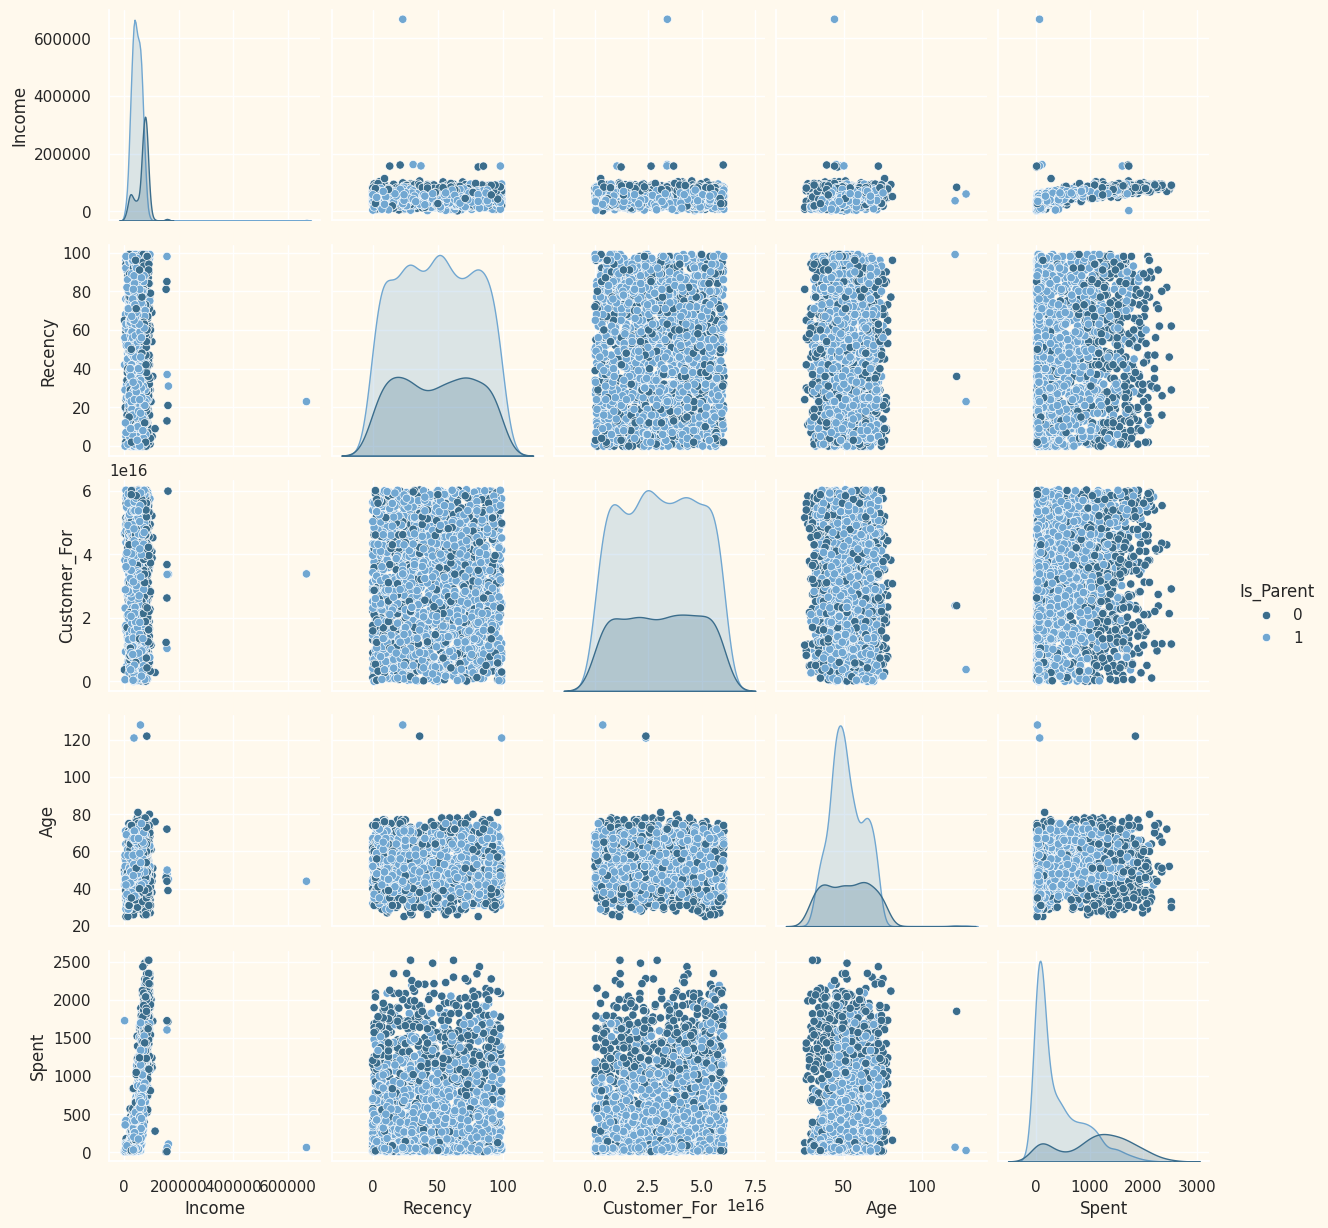

In [11]:
# Для построения графиков выбранных признаков
# Устанавливаем предпочтения для цветов
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#3B6D8C", "#5A8D9C", "#A3C4D1", "#B9D4E2", "#8A9EAB", "#71A7D1"]
cmap = colors.ListedColormap(["#3B6D8C", "#5A8D9C", "#A3C4D1", "#B9D4E2", "#8A9EAB", "#71A7D1"])

# Строим графики для следующих признаков
To_Plot = ["Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]

print("Относительный график некоторых выбранных признаков: подмножество данных")

plt.figure()
sns.pairplot(data[To_Plot], hue="Is_Parent", palette=["#3B6D8C", "#71A7D1"])

# Устанавливаем цветовую палитру
plt.show()

График показывает взаимосвязь между различными признаками клиентов, такими как доход, возраст, давность последней покупки, время в базе данных, потраченные деньги и наличие детей. По распределению **дохода** видно, что большая часть клиентов имеет средний доход, но есть несколько выбросов с очень высокими значениями, что указывает на наличие небольшого числа высокодоходных клиентов. Это создает сильно скошенное распределение. В **давности последней покупки** (Recency) можно заметить пик в нуле, что может означать большое количество клиентов, которые недавно совершили покупки, в то время как другие клиенты не делали покупок долгое время.

**Возраст** клиентов в основном сосредоточен в пределах 50-60 лет, что может указывать на то, что эта группа является основной в клиентской базе компании. При этом возраст старше 100 лет также встречается, что может быть результатом ошибок или аномальных данных. Что касается **потраченных денег**, большинство клиентов тратят небольшие суммы, но также есть несколько клиентов, которые тратят значительно больше, что может говорить о высокоактивных покупателях или выбросах.

**Наличие детей** у клиентов (Is_Parent) также оказывает влияние на их поведение. Видно, что клиенты с детьми (с значением 1) имеют немного другую динамику по возрасту, потраченным средствам и времени нахождения в базе, чем клиенты без детей. Например, они, вероятно, тратят больше денег на продукты. Это может свидетельствовать о том, что наличие детей влияет на покупательские привычки клиентов, а также на то, как долго они остаются в базе данных.



Очевидно, что в характеристиках «Доход» и «Возраст» есть несколько провалов.
Удалим эти отклонения из данных.

In [12]:
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]

print("Общее количество данных после удаления выбросов составляет:", len(data))

Общее количество данных после удаления выбросов составляет: 2212


Далее рассмотрим корреляцию между признаками

<Axes: >

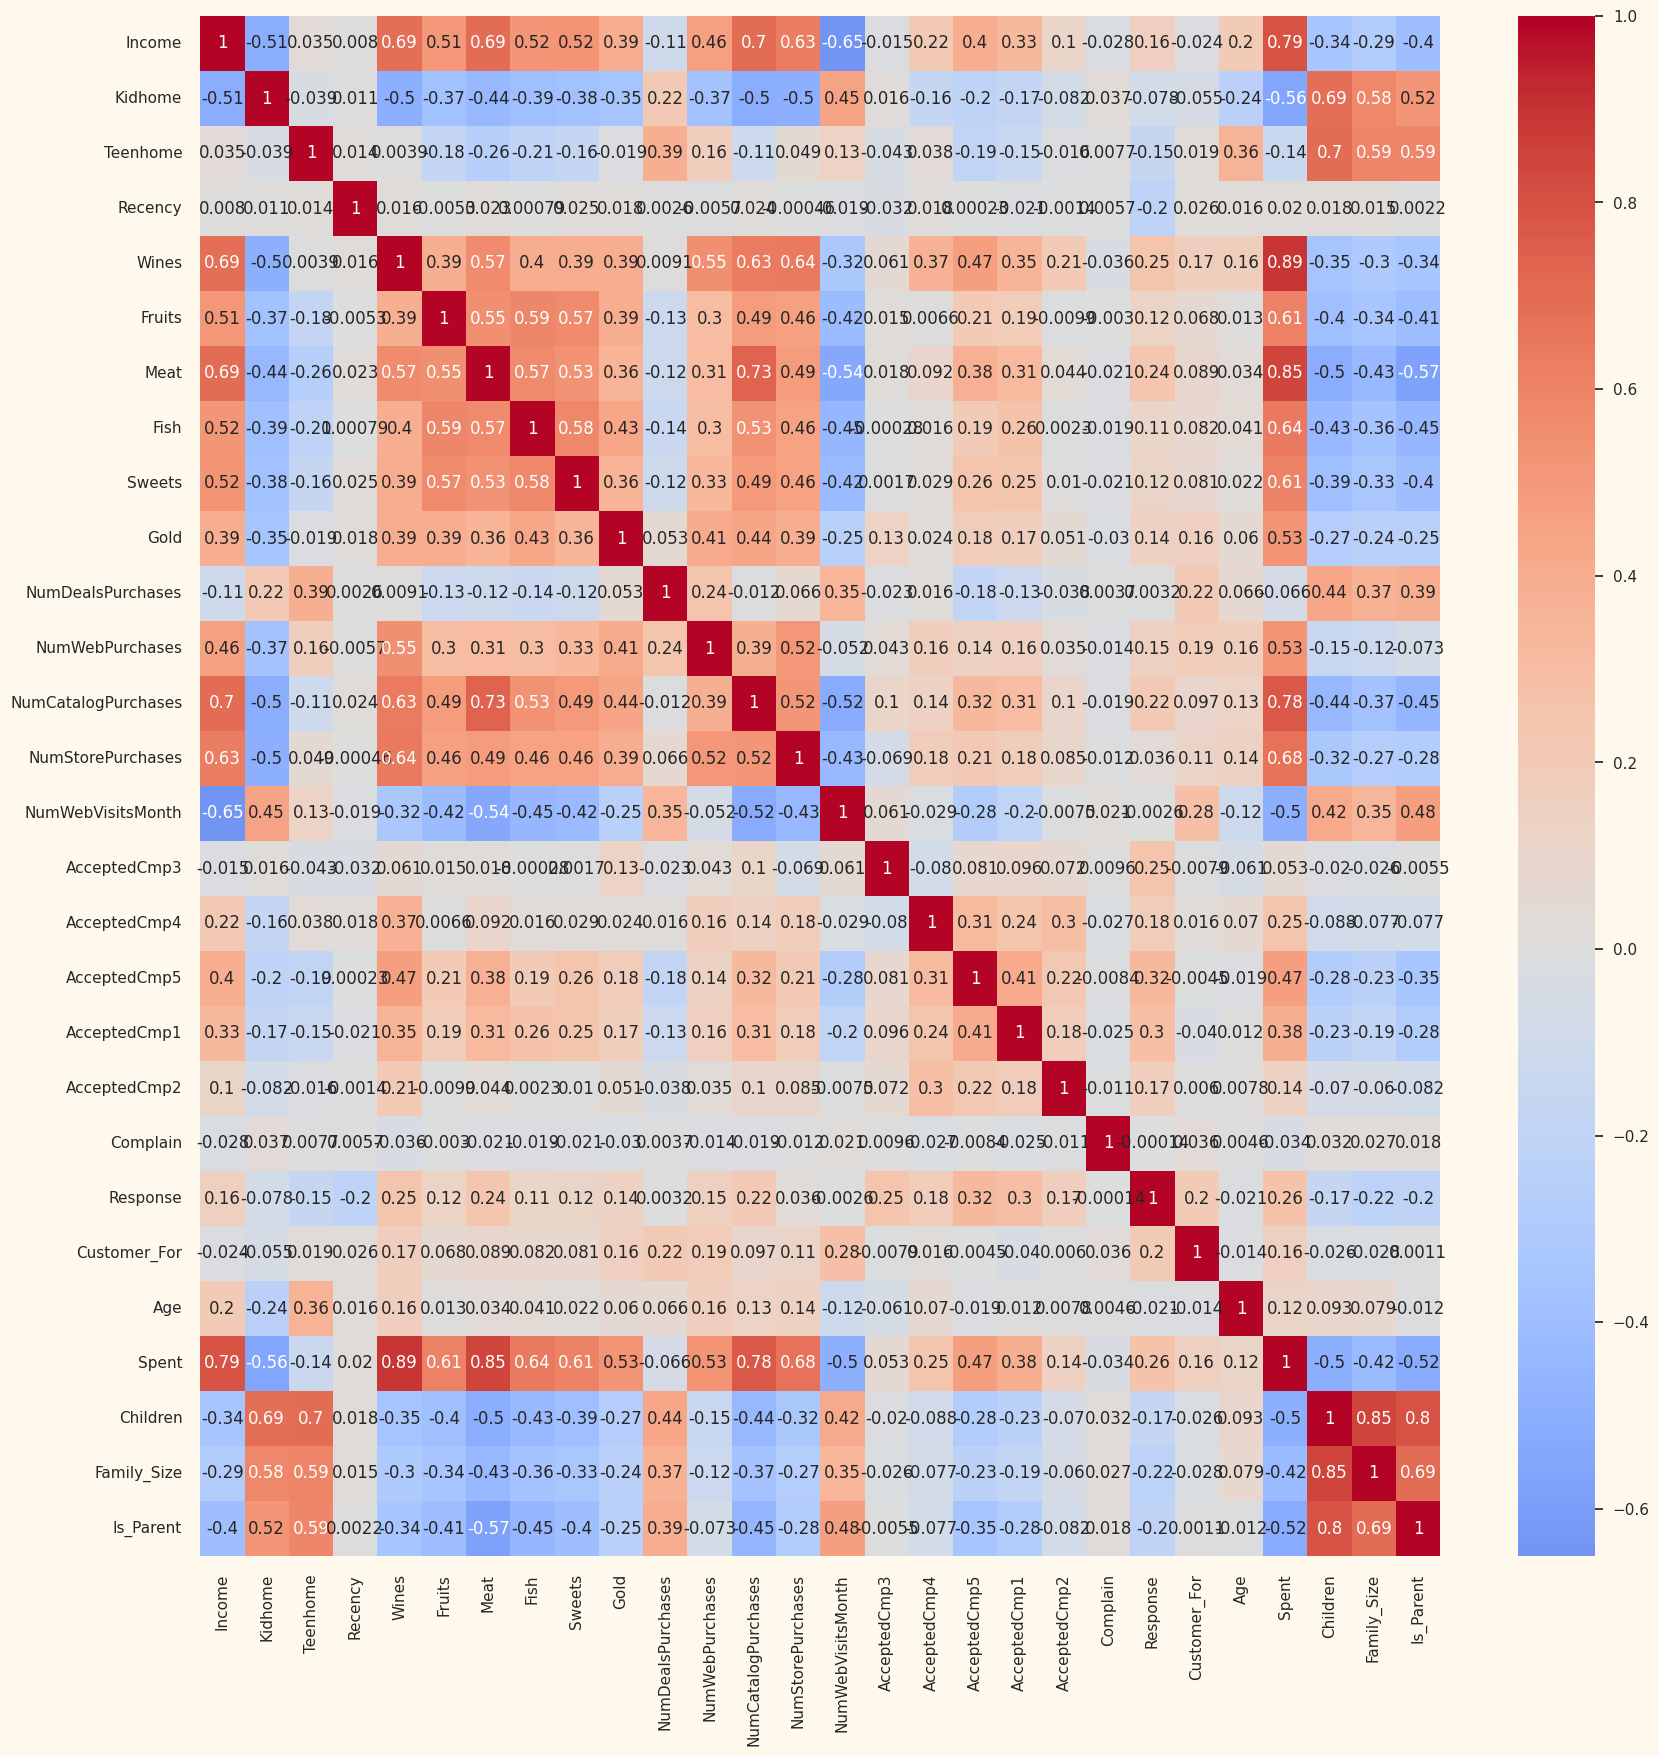

In [13]:
# Отбираем только числовые столбцы
corrmat = data.select_dtypes(include=["number"]).corr()

plt.figure(figsize=(20,20))
sns.heatmap(corrmat, annot=True, cmap="coolwarm", center=0)

На тепловой карте отображены корреляции между различными признаками в данных. Видно, что **Income (доход)** сильно коррелирует с **Spent (потраченные деньги)** (0.79), что логично, так как люди с более высоким доходом, как правило, тратят больше. Также интересна корреляция между **Income** и **Family_Size (размер семьи)** (-0.37), что может указывать на то, что с увеличением размера семьи доход может немного снижаться. Примечательно, что **Age (возраст)** имеет положительную корреляцию с **Spent**, что означает, что старшие клиенты могут тратить больше, чем молодые.

Корреляции между количеством покупок по разным каналам (например, **NumWebPurchases**, **NumStorePurchases**) и с акциями (**AcceptedCmp1** - **AcceptedCmp5**) показывают, что активные покупатели, скорее всего, участвуют в акциях и покупают больше как онлайн, так и в магазинах. Однако **Recency (давность последней покупки)** слабо коррелирует с остальными признаками, что может свидетельствовать о том, что давность покупки не имеет сильного влияния на другие финансовые или демографические параметры.

Кроме того, заметна сильная корреляция между **Children (количество детей)** и **Is_Parent (является ли родителем)** (0.69), что ожидаемо, так как наличие детей напрямую связано с тем, является ли клиент родителем.

Переходим к следующему шагу. Это предварительная обработка данных


# Data preprocessing


В данном разделе будет выполнена предварительная обработка данных, необходимая для выполнения кластеризации.

Для этого будет реализовано несколько этапов:

- Преобразование категориальных признаков в числовые значения
- Масштабирование данных с использованием стандартного скалера
- Формирование подмножества данных для выполнения снижения размерности

In [14]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Категориальных переменных в датасете:", object_cols)

Категориальных переменных в датасете: ['Education', 'Living_With']


In [16]:
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

print("Все атрибуты теперь численные")

Все атрибуты теперь численные


С помощью LabelEncoder из библиотеки sklearn осуществляется преобразование категориальных признаков в числовые значения. Каждый уникальный текст в столбце будет заменён на уникальный числовой код. Это необходимо для того, чтобы алгоритмы машинного обучения могли работать с этими признаками, так как они принимают только числовые данные.

In [17]:
ds = data.copy()

cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)

scaler = StandardScaler()
scaler.fit(ds)

scaled_ds = pd.DataFrame(scaler.transform(ds),columns = ds.columns)
print("Все атрибуты теперь масштабируются")

Все атрибуты теперь масштабируются


Масштабирование выполняется с помощью StandardScaler, который приводит данные к стандартному виду с нулевым средним и единичной дисперсией.

In [21]:
print(f"Dataframe  который будет использоваться для дальнейшего моделирования: ")
scaled_ds.head()

Dataframe  который будет использоваться для дальнейшего моделирования: 


Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.893586  0.287105 -0.822754 -0.929699  0.310353  0.977660  1.552041   
1  -0.893586 -0.260882  1.040021  0.908097 -0.380813 -0.872618 -0.637461   
2  -0.893586  0.913196 -0.822754 -0.929699 -0.795514  0.357935  0.570540   
3  -0.893586 -1.176114  1.040021 -0.929699 -0.795514 -0.872618 -0.561961   
4   0.571657  0.294307  1.040021 -0.929699  1.554453 -0.392257  0.419540   

       Meat      Fish    Sweets  ...  NumCatalogPurchases  NumStorePurchases  \
0  1.690293  2.453472  1.483713  ...             2.503607          -0.555814   
1 -0.718230 -0.651004 -0.634019  ...            -0.571340          -1.171160   
2 -0.178542  1.339513 -0.147184  ...            -0.229679           1.290224   
3 -0.655787 -0.504911 -0.585335  ...            -0.913000          -0.555814   
4 -0.218684  0.152508 -0.001133  ...             0.111982           0.059532   

   NumWebVisitsMonth  Customer_For       Age     Spent  Living_With  Children  \
0           0.692181      1.527721  1.018352  1.676245    -1.349603 -1.264598   
1          -0.132545     -1.189011  1.274785 -0.963297    -1.349603  1.404572   
2          -0.544908     -0.206048  0.334530  0.280110     0.740959 -1.264598   
3           0.279818     -1.060584 -1.289547 -0.920135     0.740959  0.069987   
4          -0.132545     -0.951915 -1.033114 -0.307562     0.740959  0.069987   

   Family_Size  Is_Parent  
0    -1.758359  -1.581139  
1     0.449070   0.632456  
2    -0.654644  -1.581139  
3     0.449070   0.632456  
4     0.449070   0.632456  

[5 rows x 23 columns]



Масштабированные данные теперь удобны для использования в алгоритмах, таких как кластеризация или регрессия, которые чувствительны к масштабу данных. Эти алгоритмы будут работать более эффективно, потому что все признаки будут иметь одинаковую шкалу, и алгоритм не будет "предпочитать" признаки с большими значениями.

Масштабирование также помогает улучшить сходимость и стабильность моделей, таких как **K-средних** или **Градиентный спуск**, которые могут работать с такими данными быстрее и точнее.


# Уменьшение размерности

**СНИЖЕНИЕ РАЗМЕРНОСТИ**

В данной задаче существует множество факторов, на основе которых будет проводиться окончательная классификация. Эти факторы представляют собой атрибуты или признаки. Чем больше признаков, тем сложнее с ними работать. Многие из этих признаков взаимосвязаны и, следовательно, избыточны. Поэтому я проведу снижение размерности на выбранных признаках перед применением классификатора.

Снижение размерности — это процесс уменьшения числа случайных переменных, которые рассматриваются, путем получения набора основных переменных.

**Метод главных компонент (PCA)** — это техника для снижения размерности таких наборов данных, которая увеличивает интерпретируемость при минимальных потерях информации.

**Этапы в этом разделе:**
- Снижение размерности с использованием метода PCA
- Визуализация уменьшенного набора данных

Для этого проекта я сокращу размерность данных до 3-х признаков.

In [22]:
pca = PCA(n_components=3)
pca.fit(scaled_ds)

PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))

PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2212.0  5.781993e-17  2.878602 -5.978124 -2.539470 -0.781595  2.386380   
col2  2212.0  6.424437e-17  1.709469 -4.194757 -1.323929 -0.173721  1.234851   
col3  2212.0  1.244735e-17  1.231687 -3.625248 -0.853713 -0.050842  0.863974   

           max  
col1  7.452915  
col2  6.168189  
col3  6.750458

Здесь используется метод главных компонент (PCA) для снижения размерности данных. Сначала мы определяем, что хотим уменьшить данные до 3 признаков (компонент) с помощью `PCA(n_components=3)`. Затем обучаем PCA на стандартизированных данных (`pca.fit(scaled_ds)`), и применяем преобразование, чтобы получить уменьшенный набор данных, состоящий из трех новых признаков (колонок) с именами "col1", "col2" и "col3".

После этого создаём DataFrame, содержащий эти новые компоненты, и выводим статистику описания для каждого из них с помощью `describe()`. Это даёт информацию о минимальных, максимальных, средних значениях и стандартных отклонениях для каждой из этих трех компонент.


Первая компонента (col1) объясняет наибольшую часть вариации в данных с большим разбросом, в то время как вторая и третья компоненты менее вариативны, но всё ещё показывают значительные отклонения. Это означает, что каждая из этих компонент играет свою роль в уменьшении размерности, но первая компонента скорее всего более важна для объяснения данных, чем остальные.

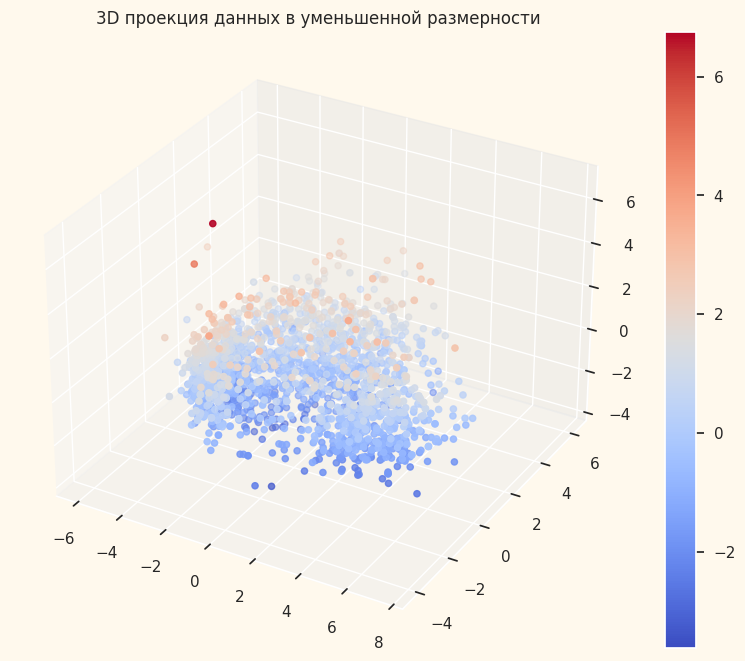

In [24]:
x = PCA_ds["col1"]
y = PCA_ds["col2"]
z = PCA_ds["col3"]

fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(111, projection="3d")
sc = ax.scatter(x, y, z, c=z, cmap='coolwarm', marker="o")
ax.set_title("3D проекция данных в уменьшенной размерности")

plt.colorbar(sc)

plt.show()

На графике изображена 3D проекция данных, после того как была уменьшена их размерность с помощью метода главных компонент (PCA). Каждая точка на графике представляет собой наблюдение из исходных данных. Цвет каждой точки отображает её значение по третьей компоненте (основному компоненту), где холодные оттенки синего соответствуют меньшим значениям, а теплые оттенки красного — большим. Это позволяет увидеть, как данные распределяются по сниженной размерности и как различаются значения третьей компоненты.

Точки сгруппированы в основном в центральной области графика, но есть и несколько точек с крайними значениями, которые выделяются на фоне остальных — эти точки окрашены в более темный красный цвет, что указывает на их экстремальные значения. В целом, данные распределены довольно равномерно по всему пространству, что отражает основную структуру и вариации данных после снижения размерности.

#  Кластеризация


Теперь, когда снизили размерность признаков до трех компонент, перейдем к кластеризации с использованием агломеративного метода. Агломеративная кластеризация — это иерархический метод кластеризации, который заключается в последовательном объединении примеров до тех пор, пока не будет достигнуто необходимое количество кластеров.

**Этапы кластеризации:**

1. Использование метода "Elbow" для определения оптимального числа кластеров.
2. Кластеризация с помощью агломеративной кластеризации.
3. Анализ образованных кластеров с помощью графика рассеяния.

Метод "Elbow" для определения количества кластеров, которые следует сформировать:


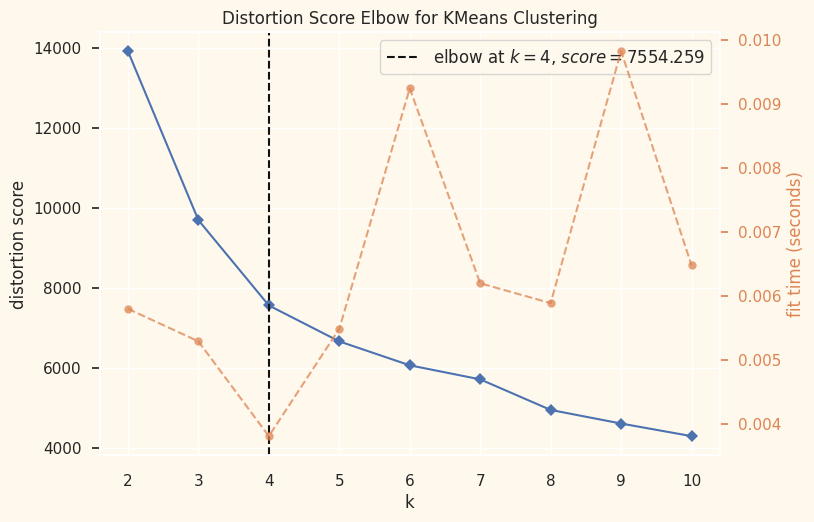

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
print('Метод "Elbow" для определения количества кластеров, которые следует сформировать:')

Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

На этом графике отображён результат применения метода локтя для определения оптимального числа кластеров для алгоритма KMeans. Основная цель метода локтя — найти "изгиб" в графике, который указывает на точку, где увеличение числа кластеров перестает существенно улучшать качество кластеризации. Это "изгиб" называют "локтем". В данном случае график показывает зависимость distortion score (оценка искажения) от количества кластеров (k).

Немного объяснений графика:

- Ось Y: отображает значение distortion score — метрика качества кластеризации, которая показывает, насколько хорошо данные разделены на кластеры. Чем ниже значение distortion, тем лучше данные разделены.
- Голубая линия: показывает изменение distortion score в зависимости от числа кластеров. С увеличением числа кластеров distortion score постепенно уменьшается, что логично, так как большее количество кластеров позволяет точнее разделить данные.
- Оранжевая пунктирная линия: показывает время, затраченное на обучение модели для каждого значения k. С увеличением числа кластеров время обучения увеличивается, что также ожидаемо.
- Чёрная вертикальная линия на уровне k=4 указывает на точку локтя, где distortion score перестает значительно уменьшаться при добавлении новых кластеров, что говорит о том, что 4 кластера — оптимальное количество для данной задачи.

График помогает визуально определить оптимальное количество кластеров для алгоритма KMeans. В данном случае, по методу локтя, оптимальное количество кластеров — 4, так как после этого количество кластеров не даёт значительного улучшения в качестве кластеризации.









In [31]:
AC = AgglomerativeClustering(n_clusters=4) # Создается объект AgglomerativeClustering, который применяет метод агломеративной кластеризации с количеством кластеров, равным 4

yhat_AC = AC.fit_predict(PCA_ds) # Обучаем можель кластеризации и присваиваем метки для каждого наблюдения
PCA_ds["Clusters"] = yhat_AC

data["Clusters"]= yhat_AC

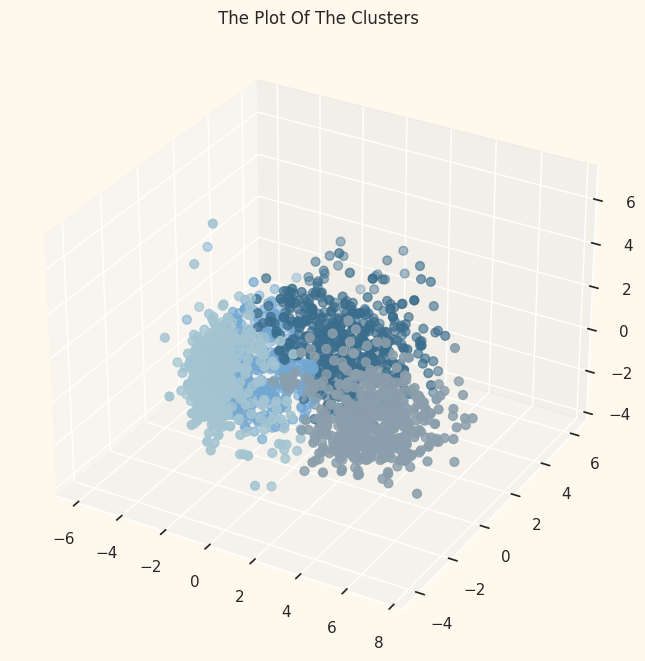

In [32]:
fig = plt.figure(figsize=(10,8))

ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")

plt.show()

Этот 3D-график рассеяния показывает, как данные, после снижения размерности с помощью PCA, были разделены на 4 кластера с помощью агломеративной кластеризации. Каждая точка на графике представляет собой наблюдение, и цвет этих точек указывает, к какому кластеру они принадлежат. Разные кластеры отображаются с различными цветами, что позволяет легко визуально различать их.









In [33]:
import plotly.express as px

fig = px.scatter_3d(PCA_ds, x='col1', y='col2', z='col3', color='Clusters',
                    title="The Plot Of The Clusters",
                    color_continuous_scale='Blues')

fig.show()

# Оценка модели

Поскольку это метод кластеризации без учителя, у нас нет размеченной целевой переменной для оценки или оценки модели. Цель этой части — изучить паттерны, выявленные в кластерах, и определить их особенности.

Для этого мы проведем исследовательский анализ данных (EDA) с учетом кластеров и сделаем соответствующие выводы.

Прежде всего, давайте рассмотрим распределение данных по группам кластеров.

<ipython-input-34-15ada7989577>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




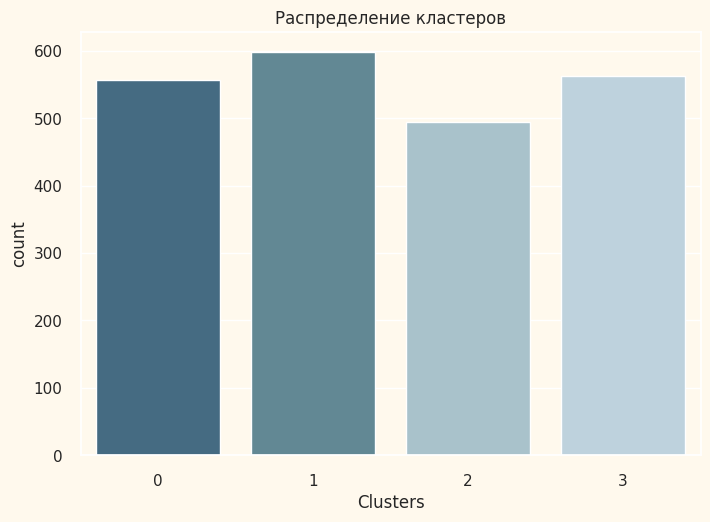

In [34]:
pal = ["#3B6D8C", "#5A8D9C", "#A3C4D1", "#B9D4E2"]

pl = sns.countplot(x=data["Clusters"], palette=pal)
pl.set_title("Распределение кластеров")

plt.show()

Этот график показывает распределение данных по кластерам, полученным с помощью агломеративной кластеризации. Мы видим, что кластеры 0 и 1 имеют примерно одинаковое количество объектов (по около 600), в то время как кластеры 2 и 3 содержат немного меньше наблюдений. Это может означать, что два кластера более плотные или важные по численности, а остальные — менее плотные.

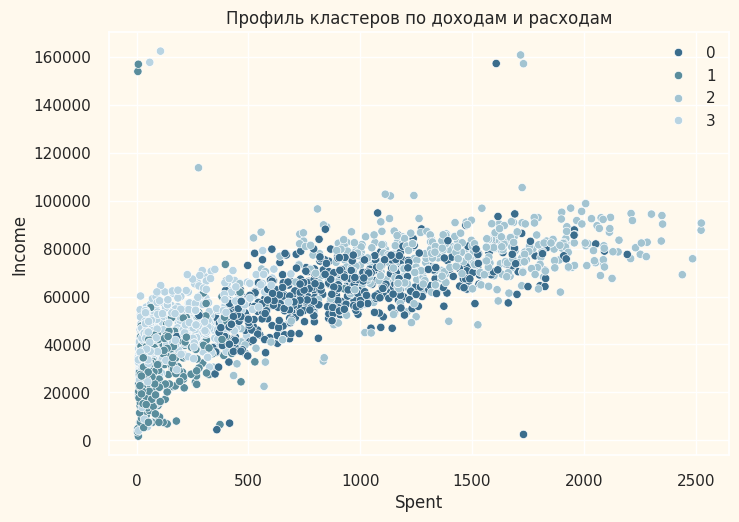

In [35]:
pl = sns.scatterplot(data = data, x=data["Spent"], y=data["Income"], hue=data["Clusters"], palette=pal)

pl.set_title("Профиль кластеров по доходам и расходам")
plt.legend()

plt.show()

На этом графике изображены два признака: **доход** (Income) и **расходы** (Spent), с разделением по кластерам. Каждый цвет точки представляет собой определенный кластер, который был получен в процессе кластеризации.

1. **Общее распределение**:
   - В целом, наблюдается положительная зависимость между расходами и доходами: чем выше доход, тем больше потраченная сумма. Это логично, так как с увеличением дохода люди могут себе позволить тратить больше.
   
2. **Выбросы**:
   - В верхней части графика, где доходы превышают **100,000**, видно несколько точек, которые значительно удалены от основной массы данных. Это **выбросы**, указывающие на клиентов с крайне высокими доходами, которые, несмотря на высокие доходы, либо не тратят много, либо делают очень большие покупки, что выделяет их на фоне остальных.
   - Также есть выбросы в области низких доходов с большими расходами (в левой нижней части), что может указывать на клиентов с низким доходом, но с высокими расходами, возможно, за счет кредитов или других факторов.

3. **Кластеры**:
   - Кластеры 0 и 3 выглядят особенно интересными: они представляют группы с более высокими расходами при разных уровнях доходов, и могут отражать различные типы потребительского поведения.
   - Кластеры 1 и 2 скорее содержат клиентов с умеренными расходами, и их доходы распределяются более равномерно по всему графику.


По крайне мере можем выделить 4 группы:

- группа 0: высокие расходы и средний доход
- группа 1: высокие расходы и высокий доход
- группа 2: низкие расходы и низкий доход
- группа 3: высокие расходы и низкий доход

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

71.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

56.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

<ipython-input-36-fc90479e8359>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

22.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.1

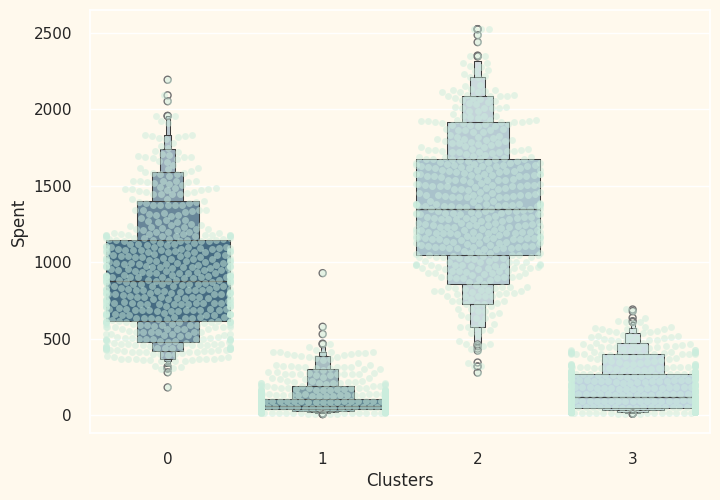

In [36]:
plt.figure()

pl=sns.swarmplot(x=data["Clusters"], y=data["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=pal)

plt.show()

Обращаем внимание на комбинацию двух видов графиков: **свормплот** (swarmplot) и **боксплот** (boxenplot), что позволяет более детально увидеть распределение данных.

**Свормплот** показывает каждую точку как отдельный элемент, что позволяет понять, как данные распределяются в каждом кластере. Точки вокруг боксплота отображают индивидуальные наблюдения, и видно, что в некоторых кластерах есть как большие значения, так и небольшие.

**Боксплот** отображает статистические характеристики каждого кластера: медиану (центр прямоугольника), квартали (границы прямоугольников), а также выбросы (точки за пределами усов). Видно, что в кластере 2 **расходы** варьируются значительно больше, чем в других кластерах, а в кластере 1 наблюдается меньшее количество данных, с более сглаженным распределением.

График дает наглядное представление о том, как различаются расходы между кластерами, где один кластер (к примеру, 2) имеет большие выбросы, а другие (например, 3) более сжаты. Это полезно для анализа потребительских привычек в разных группах клиентов.

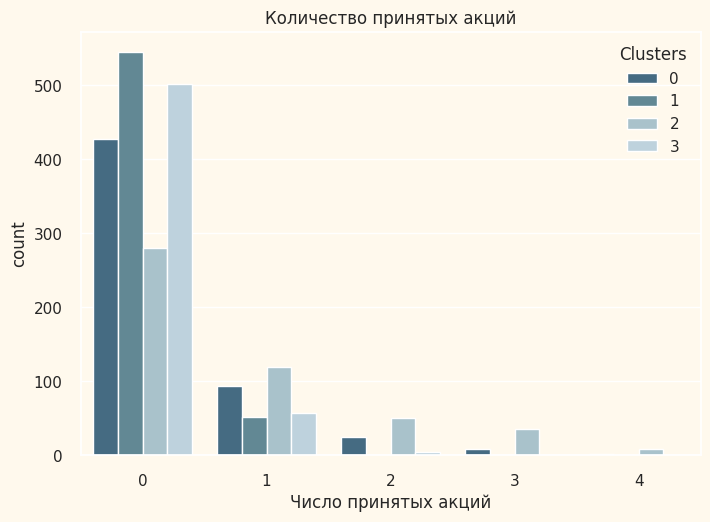

In [37]:
data["Total_Promos"] = data["AcceptedCmp1"] + data["AcceptedCmp2"] + data["AcceptedCmp3"] + data["AcceptedCmp4"] + data["AcceptedCmp5"]

plt.figure()
pl = sns.countplot(x=data["Total_Promos"], hue=data["Clusters"], palette=pal)

pl.set_title("Количество принятых акций")
pl.set_xlabel("Число принятых акций")

plt.show()

На этом графике отображено количество акций, принятых клиентами, в зависимости от числа принятых акций (по оси X) и принадлежности к кластерам (по оси Y). Каждый столбец показывает количество клиентов, которые приняли определённое количество акций. Мы видим, что большинство клиентов из всех кластеров не приняли никаких акций (значение 0). Однако для других чисел принятых акций (1, 2, 3, 4) наблюдается значительно меньшее количество клиентов, что указывает на то, что большинство клиентов либо не участвуют в акциях, либо участвуют очень редко.

Кроме того, видно, что распределение акций по кластерам отличается: в некоторых кластерах, например, в кластере 0, значительно больше клиентов, которые не участвовали в акциях. В других кластерах, таких как кластер 1, можно увидеть большее количество клиентов, принявших хотя бы одну акцию.

Пока что кампания не получила широкого отклика. В целом очень мало участников. Более того, никто не участвует во всех 5 акциях. Возможно, для повышения продаж необходимы более целенаправленные и хорошо спланированные кампании.

<ipython-input-38-f23d17f374a9>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




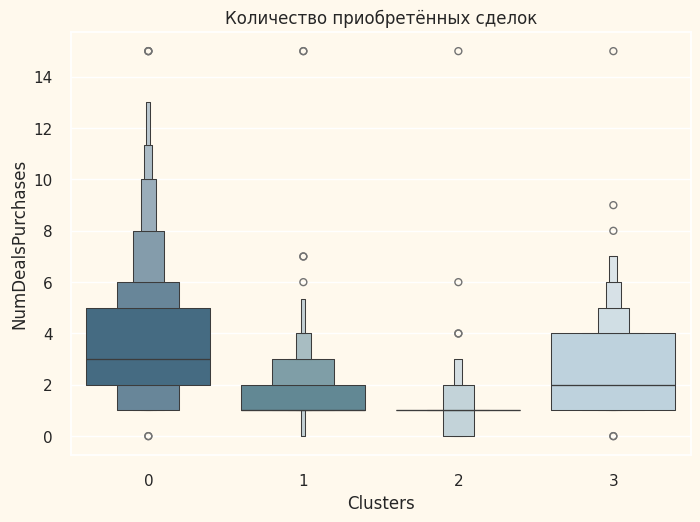

In [38]:
plt.figure()

pl = sns.boxenplot(y=data["NumDealsPurchases"], x=data["Clusters"], palette=pal)
pl.set_title("Количество приобретённых сделок")

plt.show()

В кластере 0 и кластере 3 количество приобретённых сделок значительно выше по сравнению с остальными кластерами. В этих кластерах разброс данных также больше, что указывает на разнообразие в покупательских привычках, но в целом они активно приобретают сделки. В кластере 1, который является "звёздными" клиентами, количество сделок заметно меньше, что может свидетельствовать о том, что эти клиенты больше заинтересованы в акциях, но не столь активно участвуют в покупке сделок. Кластер 2 отличается минимальной активностью в отношении сделок: данные для этого кластера расположены ближе к низким значениям и не имеют ярко выраженного пика, что говорит о слабом интересе к этим предложениям.

В отличие от акций, сделки, предлагаемые клиентам, были более успешными, особенно в кластере 0 и 3, в то время как звёздные клиенты из кластера 1 не так заинтересованы в сделках. Кластер 2 вообще не демонстрирует явного интереса к сделкам, что предполагает, что эта группа клиентов, возможно, требует другого подхода.

# **ПРОФИЛИРОВАНИЕ**

Теперь, когда мы сформировали кластеры и изучили их покупательские привычки, давайте посмотрим, кто входит в эти кластеры. Для этого мы будем профилировать сформированные кластеры и сделаем выводы о том, кто является нашим «звёздным» клиентом, а кто требует большего внимания со стороны маркетинговой команды розничного магазина.

Для того чтобы принять решение, я буду строить графики для некоторых признаков, которые характеризуют личные особенности клиентов в зависимости от их принадлежности к определенному кластеру. На основе этих результатов я сделаю соответствующие выводы.

<Figure size 800x550 with 0 Axes>

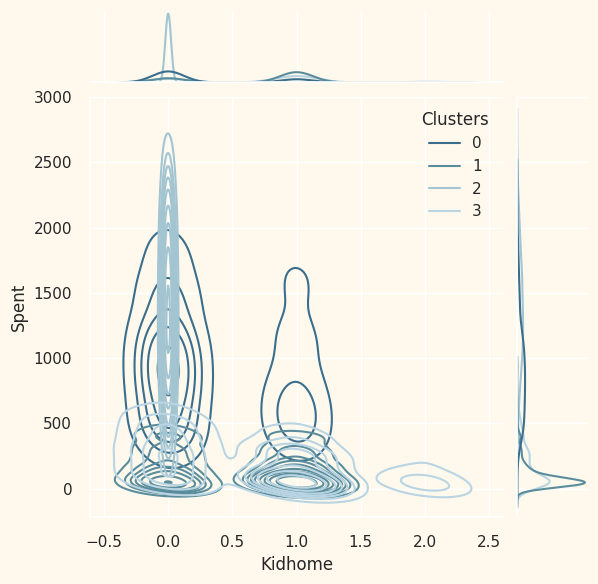

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1883: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



<Figure size 800x550 with 0 Axes>

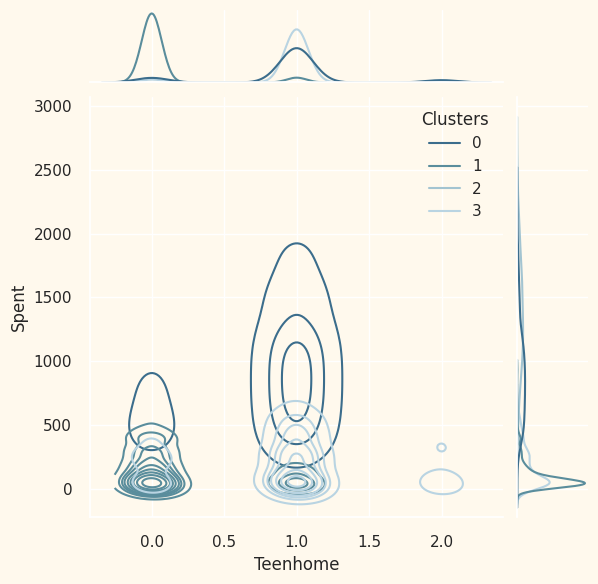

<Figure size 800x550 with 0 Axes>

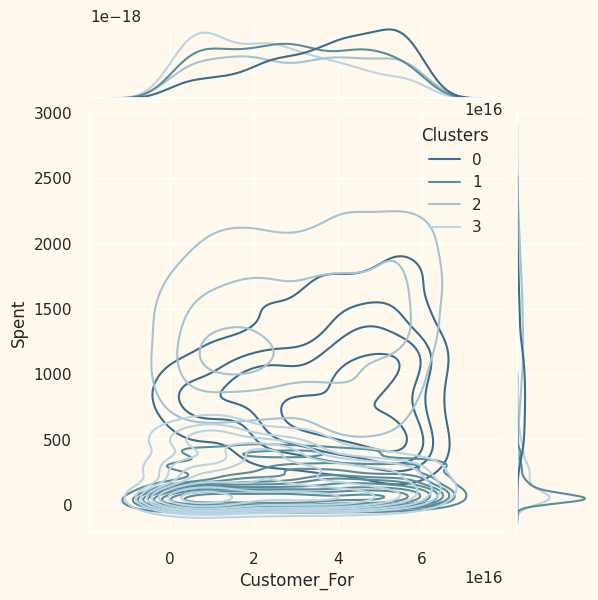

<Figure size 800x550 with 0 Axes>

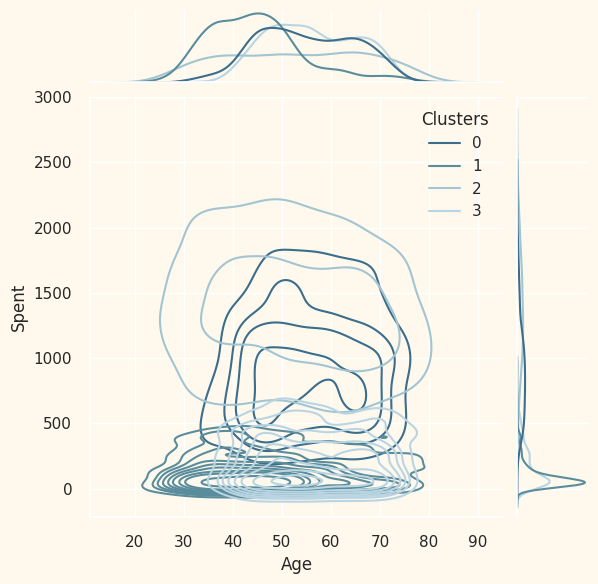

<Figure size 800x550 with 0 Axes>

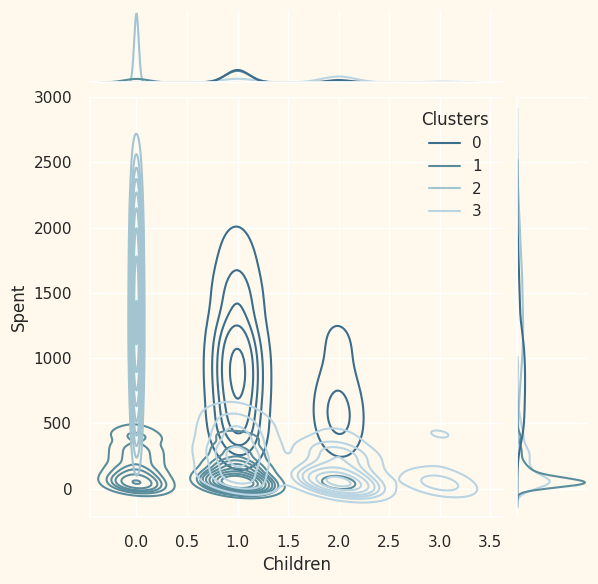

<Figure size 800x550 with 0 Axes>

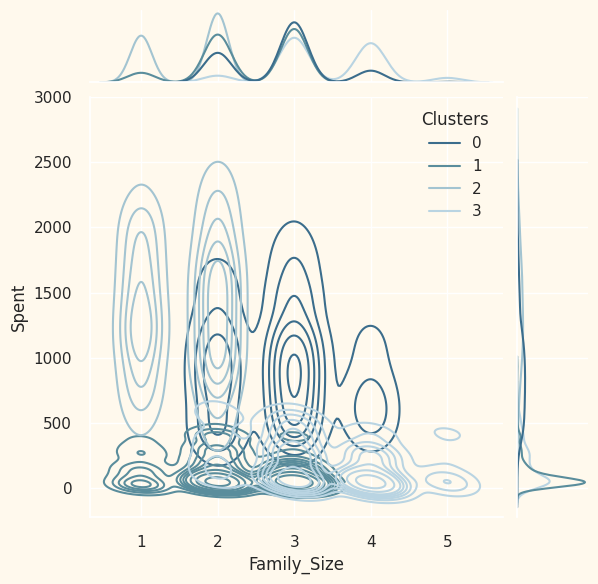

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1883: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



<Figure size 800x550 with 0 Axes>

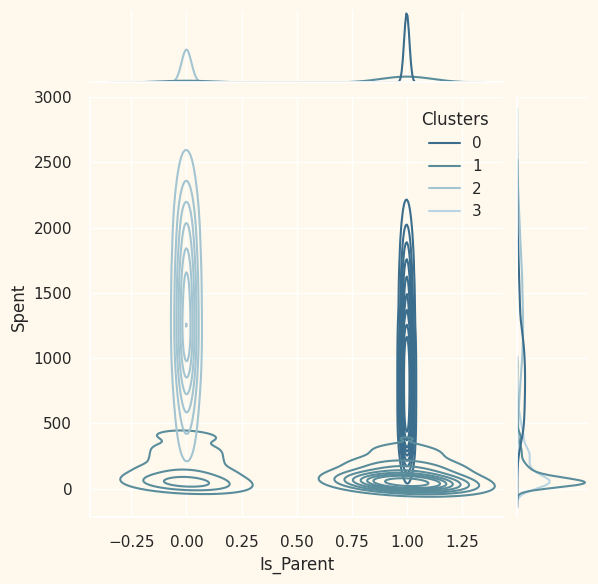

<Figure size 800x550 with 0 Axes>

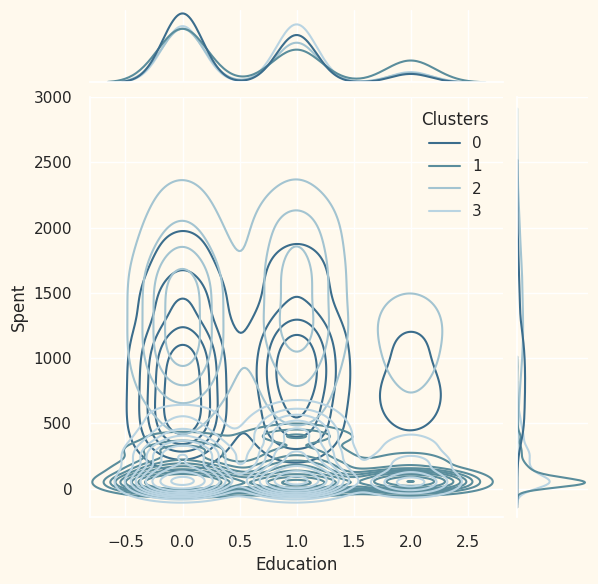

<Figure size 800x550 with 0 Axes>

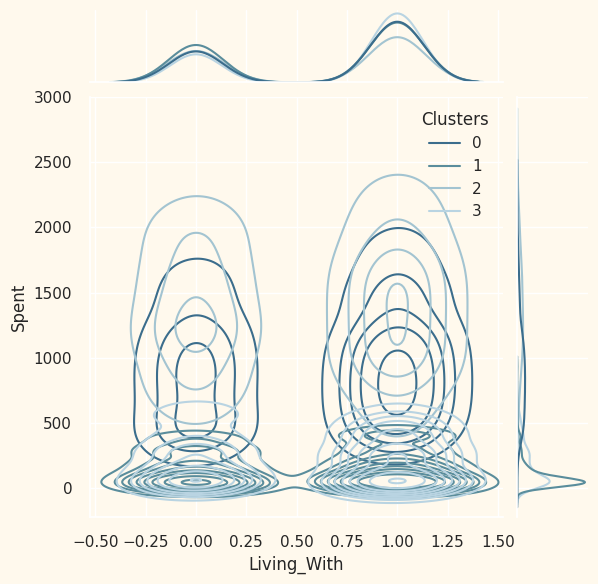

In [39]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["Clusters"], kind="kde", palette=pal)
    plt.show()

Графики на изображениях представляют собой плотностные диаграммы, которые показывают зависимость между расходами (**Spent**) и различными признаками, такими как количество детей в доме (**Kidhome**), подростков (**Teenhome**), продолжительность пребывания в магазине (**Customer_For**), возраст (**Age**), количество детей (**Children**), размер семьи (**Family_Size**), статус родителя (**Is_Parent**) и уровень образования (**Education**), а также проживание с партнером или без него (**Living_With**).

Важные наблюдения:

1. **Kidhome (Дети младшего возраста)**:
   - В кластере 0 наблюдается высокая активность по расходам среди людей с детьми, в то время как другие кластеры показывают меньшее количество трат среди таких клиентов.
   - Кластер 1 и кластер 3 имеют менее выраженные пики, что может указывать на то, что в этих группах меньше людей с маленькими детьми, или их покупательские привычки значительно отличаются.

2. **Teenhome (Подростки)**:
   - Этот показатель также четко выделяется в кластере 0, где расходы заметно возрастают при наличии подростков в доме. В кластере 1 и 2 не наблюдается такой яркой зависимости, а в кластере 3 расходы у клиентов с подростками гораздо выше, чем у остальных.

3. **Customer_For (Время пребывания клиента в магазине)**:
   - В кластере 0 расходуются большие суммы, что может свидетельствовать о том, что клиенты, долгое время остающиеся в магазине, склонны к большому расходу. Это поведение не так сильно выражено в других кластерах.

4. **Age (Возраст)**:
   - Старшие клиенты, вероятно, менее склонны тратить большие суммы. Для более молодых клиентов в некоторых кластерах, особенно в кластере 0, наблюдается более высокие расходы, что может указывать на высокую покупательскую активность среди этой группы.

5. **Children (Количество детей)**:
   - В кластере 0 больше всего клиентов с детьми, что также отражается в большем уровне расходов. В других кластерах поведение таких клиентов меньше выражено.

6. **Family_Size (Размер семьи)**:
   - Для больших семей в кластере 0 также наблюдается больше расходов. В других кластерах в отношении размера семьи зависимость расходов более слабая.

7. **Is_Parent (Является ли родителем)**:
   - В кластере 0 больше клиентов, являющихся родителями, и их расходы также более выражены, чем у тех, кто не является родителем, что подтверждается расставанием по группам.

8. **Education (Уровень образования)**:
   - В зависимости от уровня образования расходы клиентов распределяются неравномерно. Особенно заметно, что клиенты с высоким уровнем образования (например, с PhD) имеют более высокие расходы, что может свидетельствовать о покупательской способности и интересах этой группы.

9. **Living_With (Проживание с партнёром)**:
   - В кластере 0 те, кто живет с партнером, показывают более высокие расходы, чем те, кто живет один. Это также подтверждается данными для других кластеров.

Графики показывают, как различные демографические и личные характеристики клиентов влияют на их расходы, а кластеризация позволяет выделить группы с похожими покупательскими привычками. Кластеры 0 и 3 демонстрируют наиболее активных и высоко затратных клиентов, в то время как другие группы (например, кластер 1) имеют менее выраженные потребительские привычки.

**Профилирование кластеров**

**Кластер 0:**
- Это клиенты, которые определенно являются родителями.
- В семье обычно не более 4 человек и хотя бы 2 из них являются детьми.
- Однопарентальные семьи также входят в этот кластер.
- Эти клиенты относительно старше.
- В основном имеют подростков в семье.

**Кластер 1:**
- Это клиенты, которые, скорее всего, не являются родителями.
- В семьях не более 2 человек.
- Небольшая часть пар в этом кластере состоит из людей без детей.
- Этот кластер охватывает все возрастные группы.
- Эти клиенты принадлежат к группе с более высоким доходом.

**Кластер 2:**
- Большинство людей в этом кластере — это родители.
- В семье обычно не более 3 человек.
- В основном в семье есть один ребенок, обычно без подростков.
- Клиенты в этом кластере относительно моложе.

**Кластер 3:**
- Это клиенты, которые определенно являются родителями.
- В семьях обычно не более 5 человек.
- Большинство семей в этом кластере имеют подростков.
- Эти клиенты относительно старше.
- Они относятся к группе с более низким доходом.

**ЗАКЛЮЧЕНИЕ**

В этом проекте я выполнил кластеризацию, используя снижение размерности, а затем агломеративную кластеризацию. В результате я выделил 4 кластера и использовал их для профилирования клиентов в зависимости от их семейных структур и доходов/расходов. Эти данные могут быть полезны для разработки более эффективных маркетинговых стратегий.
